In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from folium import plugins

In [2]:
pd.set_option('display.max_columns', None)
df=pd.read_csv("../input/gtd/globalterrorismdb_0718dist.csv", encoding="ISO-8859-1")

In [3]:
df.shape

(181691, 135)

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
print(df['iyear'].min(), '-', df['iyear'].max())

1970 - 2017


In [6]:
df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

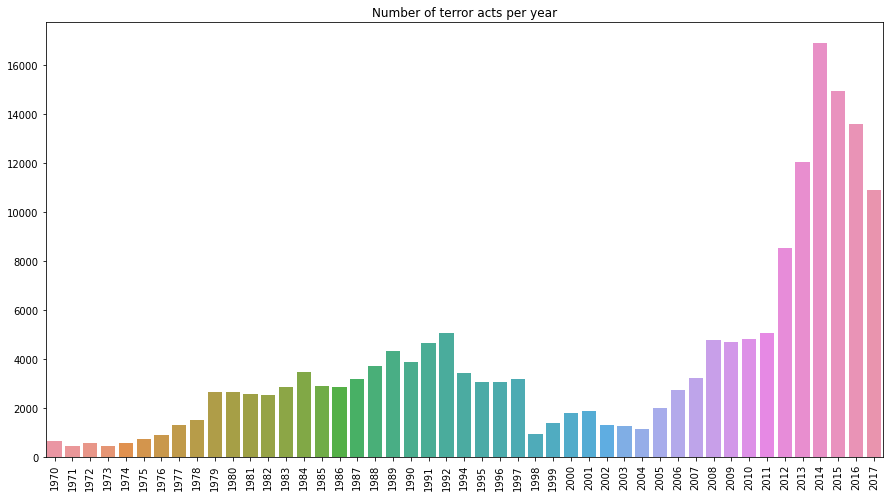

In [7]:
year_count=df['iyear'].value_counts()
plt.figure(figsize=(15, 8))
sns.barplot(x=year_count.index, y=year_count.values)
plt.xticks(rotation=90)
plt.title('Number of terror acts per year')
plt.show()

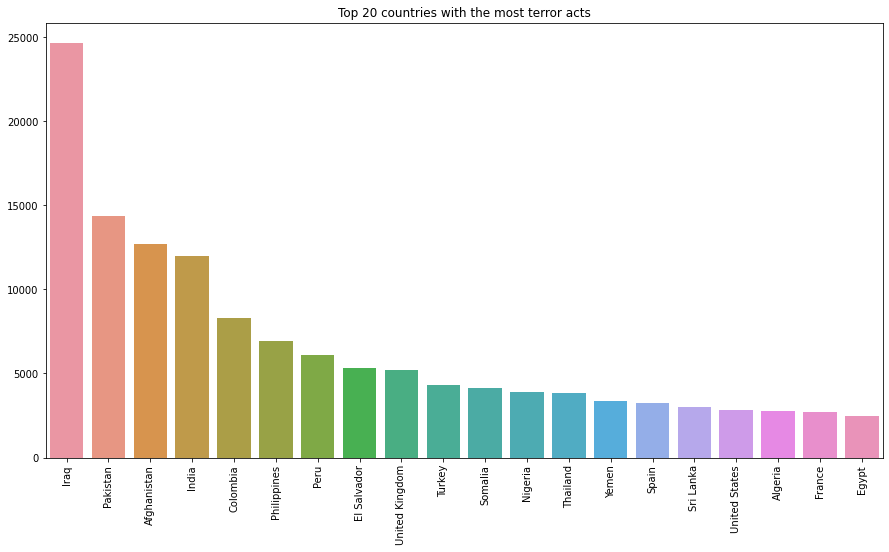

In [8]:
country_count=df['country_txt'].value_counts()
top_20=country_count.head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20.index, y=top_20.values)
plt.xticks(rotation=90)
plt.title('Top 20 countries with the most terror acts')
plt.show()

<AxesSubplot:>

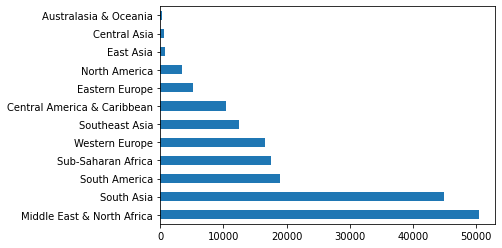

In [9]:
df['region_txt'].value_counts().plot.barh()

In [10]:
df['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [11]:
azerbaijan=df[df['country_txt']=='Azerbaijan']
azerbaijan['iyear'].value_counts()

1992    12
1994    11
2001     4
1991     3
2014     3
1995     2
1996     2
2008     2
2009     2
2016     2
2017     2
1997     1
2000     1
2002     1
2007     1
Name: iyear, dtype: int64

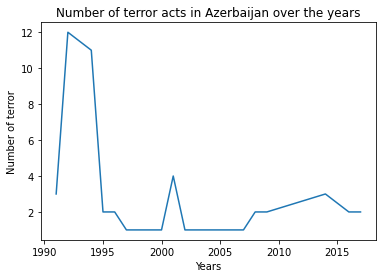

In [12]:
year_count=azerbaijan['iyear'].value_counts()
sns.lineplot(x=year_count.index, y=year_count.values)
plt.xlabel('Years')
plt.ylabel('Number of terror')
plt.title('Number of terror acts in Azerbaijan over the years')
plt.show()

In [13]:
gname=df[df['gname']!='Unknown']['gname'].value_counts()
gname

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
                                                    ... 
Ansar Sarallah                                         1
Sword of Islam                                         1
Support of Ocalan-The Hawks of Thrace                  1
Arab Revolutionary Front                               1
MANO-D                                                 1
Name: gname, Length: 3536, dtype: int64

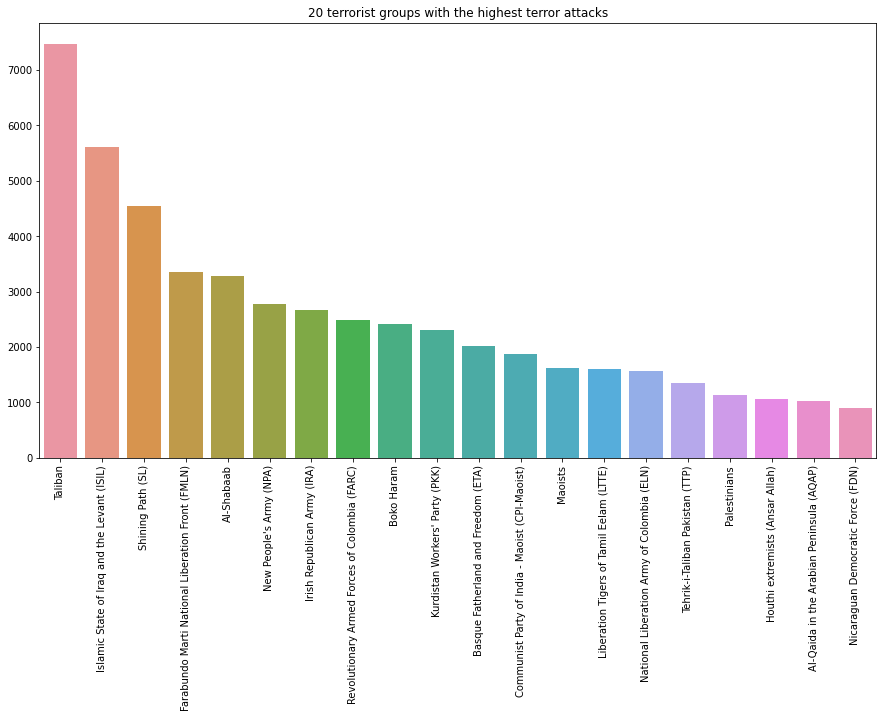

In [14]:
top_20=gname.head(20)
plt.figure(figsize=(15, 8))
sns.barplot(x=top_20.index, y=top_20.values)
plt.xticks(rotation=90)
plt.title('20 terrorist groups with the highest terror attacks')
plt.show()

In [15]:
azerbaijan['gname'].value_counts()

Unknown                     34
Azerbaijan Guerrillas        7
Armenian Guerrillas          2
Forest Brothers              2
Opposition Group             1
Sandval (union) Movement     1
Yekbun                       1
Separatists                  1
Name: gname, dtype: int64

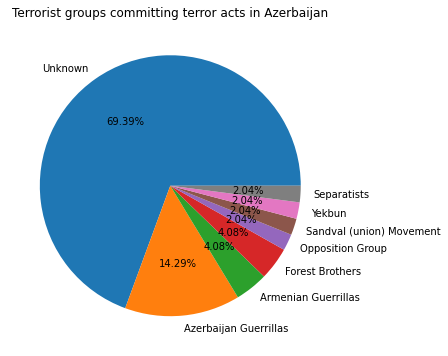

In [16]:
az_gname=azerbaijan['gname'].value_counts()
plt.figure(figsize=(18, 6))
langs = az_gname.index
count=az_gname.values
plt.pie(count, labels = langs, autopct='%1.2f%%')
plt.title('Terrorist groups committing terror acts in Azerbaijan')
plt.show()

In [17]:
top_20_terror=df.sort_values('nkill', ascending=False).head(20)
top_20_terror['country_txt'].value_counts()

Iraq                                5
United States                       2
Syria                               2
Rwanda                              1
Somalia                             1
Nepal                               1
Iran                                1
Democratic Republic of the Congo    1
Mozambique                          1
Burundi                             1
Russia                              1
Canada                              1
Sri Lanka                           1
Nigeria                             1
Name: country_txt, dtype: int64

In [18]:
country_count=df['country_txt'].value_counts()
geog=pd.DataFrame({'country':country_count.index, 'number_of_attacks':country_count.values})
geog.head()

,country,number_of_attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [19]:
fig = px.choropleth(geog, locations="country", 
                    locationmode='country names', color="number_of_attacks", 
                    hover_name="country", range_color=[1, 1000], 
                    color_continuous_scale="blues", 
                    title='Number of terrorist attacks by country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

<AxesSubplot:>

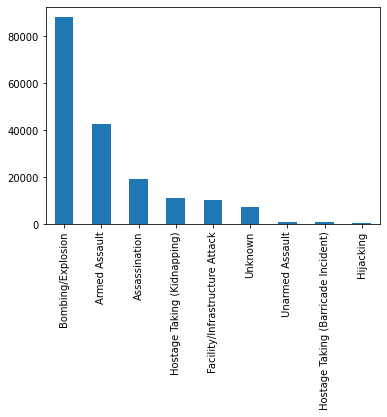

In [20]:
df['attacktype1_txt'].value_counts().plot.bar()